In [160]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [161]:
df = pd.read_excel("../xlsx/xpm_dataset_copy.xlsx") 
df.head()

,File,Pxl-0,Pxl-1,Pxl-2,Pxl-3,Pxl-4,Pxl-5,Pxl-6,Pxl-7,Pxl-8,...,Pxl-9991,Pxl-9992,Pxl-9993,Pxl-9994,Pxl-9995,Pxl-9996,Pxl-9997,Pxl-9998,Pxl-9999,Letter
0,xpm_single-letter-0-0.xpm,116,116,116,116,116,116,116,116,116,...,255,255,255,255,255,255,255,255,255,a
1,xpm_single-letter-0-100.xpm,116,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,b
2,xpm_single-letter-0-200.xpm,116,116,116,116,116,116,116,116,116,...,255,255,255,255,255,255,255,255,255,c
3,xpm_single-letter-0-300.xpm,116,116,116,116,116,116,116,116,116,...,255,255,255,255,255,255,255,255,255,c
4,xpm_single-letter-0-400.xpm,116,116,116,116,116,116,116,116,116,...,255,255,255,255,255,255,255,255,255,d


In [162]:
pixel_colnames = df.columns[1:-1] # last column is the label
pixel_colnames

Index(['Pxl-0', 'Pxl-1', 'Pxl-2', 'Pxl-3', 'Pxl-4', 'Pxl-5', 'Pxl-6', 'Pxl-7',
       'Pxl-8', 'Pxl-9',
       ...
       'Pxl-9990', 'Pxl-9991', 'Pxl-9992', 'Pxl-9993', 'Pxl-9994', 'Pxl-9995',
       'Pxl-9996', 'Pxl-9997', 'Pxl-9998', 'Pxl-9999'],
      dtype='object', length=10000)

In [163]:
# Get all columns except the label column for the first image
#image_values = df.loc[0, pixel_colnames].values
#image_values

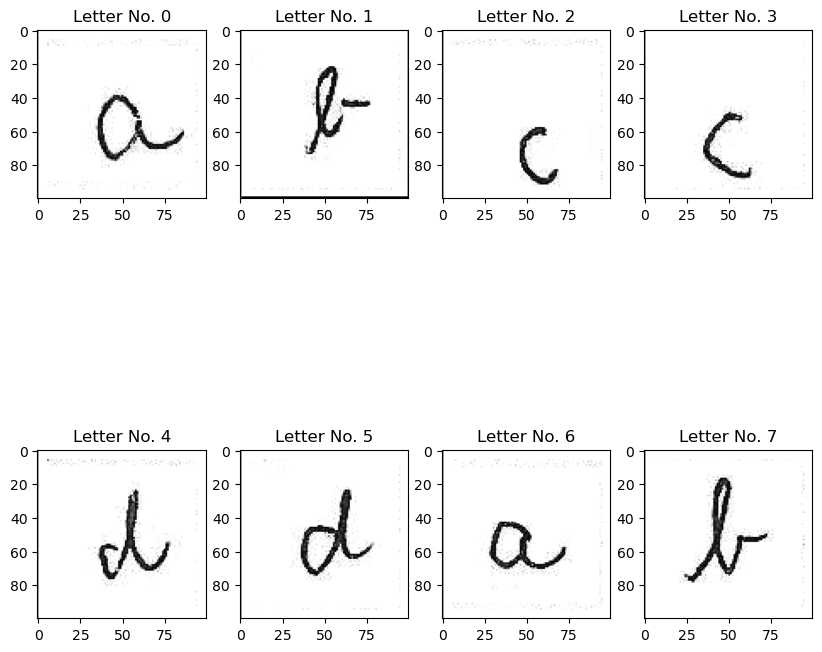

In [164]:
# Plot the first few letters
plt.figure(figsize=(10,10))
nrows, ncols = 2, 4
for index in range(0, nrows*ncols):
    plt.subplot(nrows, ncols, 1 + index )
    image_values = np.array([float(df.loc[index, colname]) for colname in pixel_colnames])
    image_label = df.loc[index, 'Letter']
    plt.imshow(image_values.reshape(100,100), cmap ='gray')
    plt.title('Letter No. ' + str(index))

In [165]:
X_train, X_test, y_train, y_test = train_test_split(df[pixel_colnames], df['Letter'], random_state=0)

In [166]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [175]:
# List the rows of the original dataframe that were used in X_test
X_test_index = X_test.index # row numbers of the origibnal dataframe
print(list(X_test_index))

# List the above row numbers with their associated letters
df_test_rows_letters = DataFrame(df.iloc[X_test_index, -1])
df_test_rows_letters.head()

[45, 29, 43, 61, 34, 33, 31, 40, 26, 62, 22, 2, 11, 28, 54, 4]


,Letter
45,d
29,d
43,c
61,d
34,c


In [168]:
# multi_class is specifying one versus rest
clf = LogisticRegression(solver='liblinear',
                         multi_class='ovr', 
                         random_state = 0)

clf.fit(X_train_scaled, y_train)
print('Training accuracy:', clf.score(X_train_scaled, y_train))
print('Test accuracy:', clf.score(X_train_scaled, y_train))

Training accuracy: 1.0
Test accuracy: 1.0


In [169]:
clf.intercept_

array([-0.09090364, -0.05851646, -0.11014836, -0.08578733])

In [170]:
clf.coef_.shape

(4, 10000)

## Predictions

In [185]:
# For each row of the test set, show the predicted probabilities for each letter
df_clf = DataFrame(clf.predict_proba(X_test_scaled), columns=['a', 'b', 'c', 'd'])
df_clf.head()

,a,b,c,d
0,4.649678e-02,0.001948,3.823770e-03,0.947731
1,4.078581e-07,0.062542,8.199163e-09,0.937458
2,1.792338e-03,0.002288,9.951898e-01,0.000730
3,4.807920e-01,0.122651,4.385836e-03,0.392171
4,9.292075e-02,0.005530,8.816418e-01,0.019907


In [172]:
# Show the letters predicted from the above probabilities
df_predictions = np.array(clf.predict(X_test_scaled))
df_predictions

array(['d', 'd', 'c', 'a', 'c', 'b', 'b', 'a', 'c', 'a', 'a', 'c', 'c',
       'd', 'a', 'd'], dtype=object)

In [178]:
# Print the original dataframe row numbers, 
# the model's predicted letters and the dataframe's actual letters.
print("Row in Original    Predicted Letter    Actual Letter")
for i in range(len(df_predictions)):
    print('{:^15}{:^20}{:^17}'.format(df_test_rows_letters.index[i],
        df_predictions[i], df_test_rows_letters.iloc[i, 0]))

Row in Original    Predicted Letter    Actual Letter
      45                d                  d        
      29                d                  d        
      43                c                  c        
      61                a                  d        
      34                c                  c        
      33                b                  b        
      31                b                  b        
      40                a                  a        
      26                c                  c        
      62                a                  a        
      22                a                  a        
       2                c                  c        
      11                c                  c        
      28                d                  d        
      54                a                  a        
       4                d                  d        


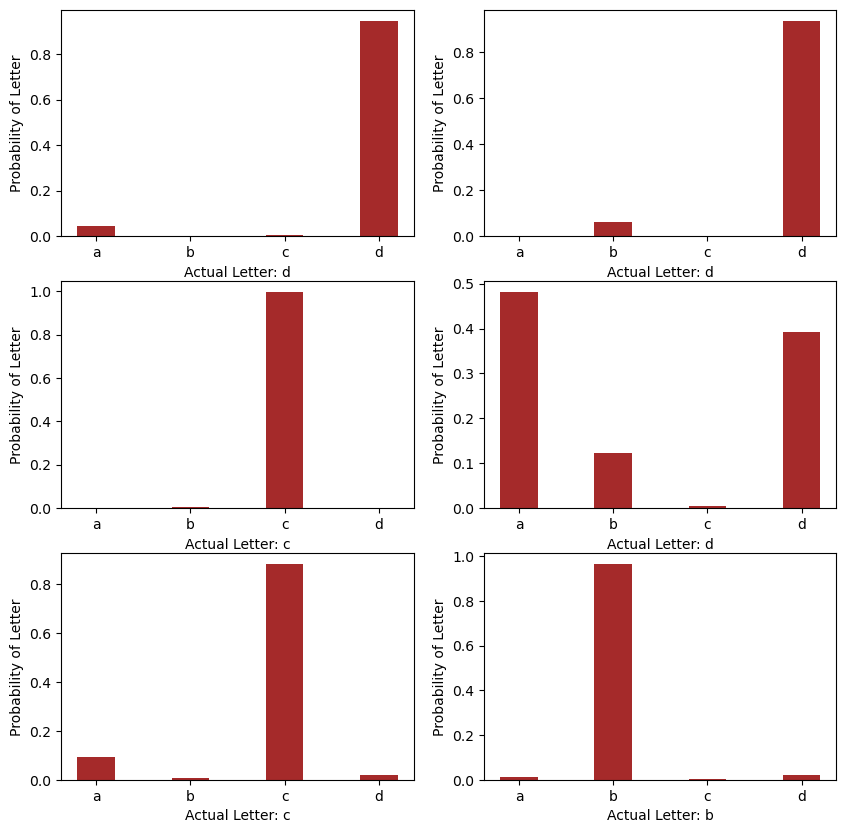

In [209]:
# creating the dataset
letters = ['a', 'b', 'c', 'd']
nrows, ncols = 3, 2
fig = plt.figure(figsize = (10, 10))

# creating the bar plot    plt.subplot(nrows, ncols, 1 + index )
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, 1 + i )
    plt.bar(letters, df_clf.iloc[i], color ='brown', width = 0.4)
    plt.xlabel("Actual Letter: " + df_test_rows_letters.iloc[i, 0])
    plt.ylabel("Probability of Letter")
plt.show()
